# 센터 함수

player 앱의 views.py 맨 상단에 위에 함수들 정의 안되어있는거 있으면 추가 해주세요

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

- 아래 center함수는
- DB불러오는 부분이랑
- static에 사진 저장하는 경로만 수정하면 됩니다

In [3]:
def setter(csv):
        
    center = csv

    center["공격 성공률"] = center["공격 성공"]/center["공격 시도"]
    center["공격 효율"] = (center["공격 성공"] - center["공격 상대 블락"] - center["공격 범실"])/center["공격 시도"]
    center["서브 성공률"] = center["서브 성공"]/center["서브 시도"]
    center["세트 성공률"] = center["세트 성공"]/center["세트 시도"]
    center["블로킹 성공률"] = center["블로킹 성공"]/center["블로킹 시도"]
    center["리시브 효율"] = (center["리시브 정확"]-center["리시브 실패"])/center["리시브 시도"]
    center["디그 성공률"] = center["디그 성공"]/center["디그 시도"]

    top_center = center.iloc[:,[1,2,-1,-2,-3,-4,-5,-6,-7]]
    top_center = top_center.fillna(0)
    top_center = top_center.replace([np.inf],0)

    # 세터 포지션에서 현대캐피탈 선수 목록
    top_center_hdc = top_center.loc[top_center["구단"]=="현대캐피탈"]["선수명"].tolist()

    # 수치데이터 스케일링
    top_center_scaled = pd.DataFrame(scaler.fit_transform(top_center.iloc[:,2:]),columns = top_center.columns[2:])
    top_center_scaled

    # 선수명이랑 스케일링한 데이터 병합
    final = pd.concat([top_center["선수명"],top_center_scaled], axis =1)

    # 그래프 표시할 x축 값 리스트 생성
    blocking = final["블로킹 성공률"].tolist()
    set = final["세트 성공률"].tolist()
    serve = final["서브 성공률"].tolist()
    attack_e = final["공격 효율"].tolist()
    attack = final["공격 성공률"].tolist()
    receive = final["리시브 효율"].tolist()
    dig = final["디그 성공률"].tolist()

    # 그래프 작성하려면 y축 값도 있긴 해야해서 y값 리스트 생성
    y_blocking = np.zeros(len(blocking))+1
    y_set = np.zeros(len(set))+1
    y_serve = np.zeros(len(serve))+1
    y_attack_e = np.zeros(len(attack_e))+1
    y_attack = np.zeros(len(attack))+1
    y_receive = np.zeros(len(attack))+1
    y_dig = np.zeros(len(attack))+1


    for player in top_center_hdc :
        plt.figure(figsize=(9,14),facecolor = "white")

        plt.subplot(7,1,1)
        # y축 삭제하기위해 ax 설정
        ax = plt.gca()

        # 모든 선수 점 찍기
        plt.scatter(blocking,y_blocking,c = "black")

        # 해당 선수 점 찍기
        plt.scatter(final.loc[final["선수명"]== player ,"블로킹 성공률"],1,s=150,c ="r")

        plt.ylim()
        plt.title('블로킹 성공률', fontsize = 15)
        plt.ylabel('Y-Axis')
        plt.axis('scaled')

        # x축 y축 삭제
        ax.axes.yaxis.set_visible(False)
        plt.gca().axes.xaxis.set_visible(False)



        plt.subplot(7,1,2)
        # y축 삭제하기위해 ax 설정
        ax = plt.gca()

        # 모든 선수 점 찍기
        plt.scatter(set,y_set,c = "black")

        # 해당 선수 점 찍기
        plt.scatter(final.loc[final["선수명"]== player ,"세트 성공률"],1,s=150,c ="r")

        plt.xlim(-1,1)
        plt.ylim()
        plt.title('세트 성공률', fontsize = 15)
        plt.ylabel('Y-Axis')
        plt.axis('scaled')

        # x축 y축 삭제
        ax.axes.yaxis.set_visible(False)
        plt.gca().axes.xaxis.set_visible(False)



        plt.subplot(7,1,3)
        # y축 삭제하기위해 ax 설정
        ax = plt.gca()

        # 모든 선수 점 찍기
        plt.scatter(serve,y_serve,c = "black")

        # 해당 선수 점 찍기
        plt.scatter(final.loc[final["선수명"]== player ,"서브 성공률"],1,s=150,c ="r")

        
        plt.title('서브 성공률', fontsize = 15)
        plt.ylabel('Y-Axis')
        plt.axis('scaled')

        # x축 y축 삭제
        ax.axes.yaxis.set_visible(False)
        plt.gca().axes.xaxis.set_visible(False)


        plt.subplot(7,1,4)
        # y축 삭제하기위해 ax 설정
        ax = plt.gca()

        # 모든 선수 점 찍기
        plt.scatter(attack_e,y_attack_e,c = "black")

        # 해당 선수 점 찍기
        plt.scatter(final.loc[final["선수명"]== player ,"공격 효율"],1,s=150,c ="r")

        
        plt.title('공격 효율', fontsize = 15)
        plt.ylabel('Y-Axis')
        plt.axis('scaled')

        # x축 y축 삭제
        ax.axes.yaxis.set_visible(False)
        plt.gca().axes.xaxis.set_visible(False)




        plt.subplot(7,1,5)
        # y축 삭제하기위해 ax 설정
        ax = plt.gca()

        # 모든 선수 점 찍기
        plt.scatter(attack,y_attack,c = "black")

        # 해당 선수 점 찍기
        plt.scatter(final.loc[final["선수명"]== player ,"공격 성공률"],1,s=150,c ="r")

        
        plt.title('공격 성공률', fontsize = 15)
        plt.ylabel('Y-Axis')
        plt.axis('scaled')

        # x축 y축 삭제
        ax.axes.yaxis.set_visible(False)
        plt.gca().axes.xaxis.set_visible(False)



        plt.subplot(7,1,6)
        # y축 삭제하기위해 ax 설정
        ax = plt.gca()

        # 모든 선수 점 찍기
        plt.scatter(attack,y_attack,c = "black")

        # 해당 선수 점 찍기
        plt.scatter(final.loc[final["선수명"]== player ,"리시브 효율"],1,s=150,c ="r")

        
        plt.title('리시브 효율', fontsize = 15)
        plt.ylabel('Y-Axis')
        plt.axis('scaled')

        # x축 y축 삭제
        ax.axes.yaxis.set_visible(False)
        plt.gca().axes.xaxis.set_visible(False)




        plt.subplot(7,1,7)
        # y축 삭제하기위해 ax 설정
        ax = plt.gca()

        # 모든 선수 점 찍기
        plt.scatter(attack,y_attack,c = "black")

        # 해당 선수 점 찍기
        plt.scatter(final.loc[final["선수명"]== player ,"디그 성공률"],1,s=150,c ="r")

        
        plt.title('디그 성공률', fontsize = 15)
        plt.ylabel('Y-Axis')
        plt.axis('scaled')

        # x축 y축 삭제
        ax.axes.yaxis.set_visible(False)
        plt.gca().axes.xaxis.set_visible(False)



        # plt.axis("off")
        plt.savefig('C:/image/'+str(player)+'_순위.png', bbox_inches = 'tight')
        plt.show()

### 함수 사용

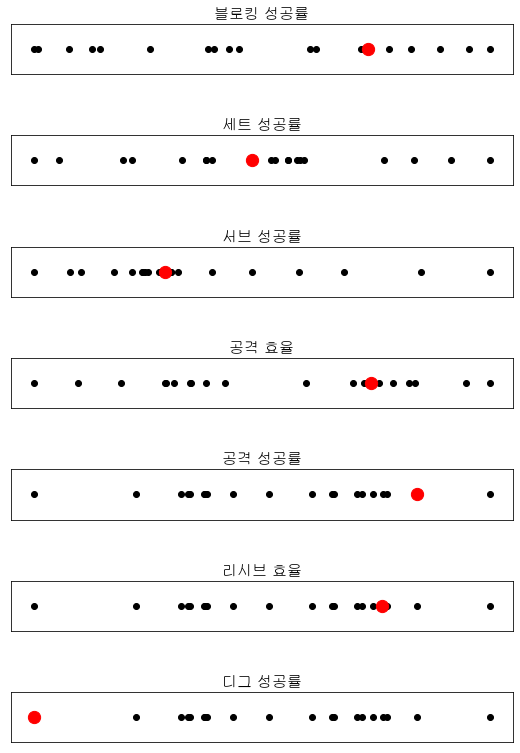

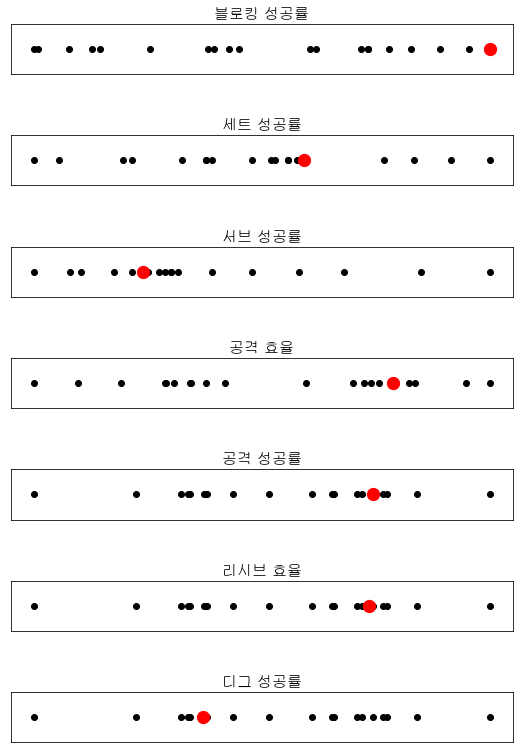

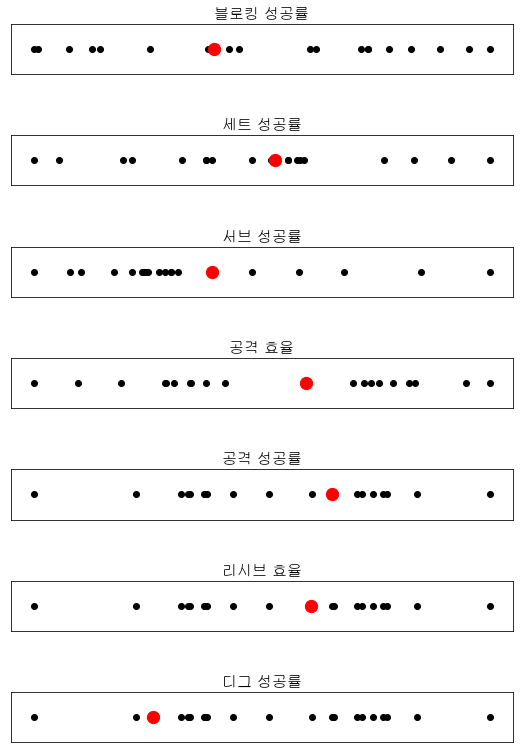

In [5]:
df = pd.read_csv("C:/kovo/player_graph_app_center_player.csv")
setter(df)